In [162]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from ipywidgets import widgets, interactive, Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

In [163]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"


In [164]:
df= pd.read_csv(filepath_master)
df_base = df

In [165]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = (20)

In [166]:
def perc_data_bymatch(datatype):
    basetype = datatype.split('_')[0]
    match_totals = df[[basetype]].groupby(df.MATCH_ID).sum()

    def _percentage(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[basetype]
        percentage = (x[basetype]/ total_row_output)*100
        return float(("%.2f" % round(percentage,2)))

    df[datatype] = df.apply(_percentage, axis=1)
    return df[datatype]

In [167]:
def axis(temp_df,comparison_data, input_data):

    df_win = temp_df[temp_df.RESULT == "Win"]
    df_lose = temp_df[temp_df.RESULT == "Lose"]
    
    x1 = df_win[comparison_data]
    x2 = df_lose[comparison_data]
    y1 = df_win[input_data]
    y2= df_lose[input_data]
    return x1, x2, y1, y2

In [168]:
def best_fit (x1, y1,colour, totals_type):  
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    alpha = 0.8
    if totals_type == 'non_totals':
        return plt.plot(np.sort(x1), ffit,colour, linewidth= 3, alpha = alpha)
    else: 
        return plt.plot(np.sort(x1), ffit,colour, linestyle='--', alpha = alpha)

In [169]:
def plot_date (x, y, sizes, colors, labels, alphas):
    return plt.plot_date(x, y, markersize= sizes, markerfacecolor = colors, label= labels, alpha = alphas)

In [170]:
def plot_scatter (x, y, sizes, colors, labels, alphas):
    return plt.scatter(x, y, s= sizes, color = colors, label= labels, alpha = alphas)

In [171]:
def make_graphfunction(year, teamname, comparison_data, input_data):  
 

    if '_' in comparison_data:
        perc_data_bymatch(comparison_data)
    if '_' in input_data:
        perc_data_bymatch(input_data)

    
    if comparison_data == 'TIME':
        comparison_data = 'PLOT_TIME' 
    clean_df = df
    
    if (teamname == 'All') & (year == 'All') :
        data_list = axis(clean_df,comparison_data, input_data)
        totals_list = 'No_Totals_List'
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS (2001-2017)" 
        time_size = 4.5
        data_size = 14.5
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

   
    elif (teamname == 'All') & (year != 'All') :
        data_list = axis(clean_df[clean_df.YEAR == int(year)] , comparison_data, input_data)
        totals_list = 'No_Totals_List'
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS"  + ' ' +  year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
    
    

    elif(teamname != 'All') & (year == 'All') :
        data_list = axis(clean_df[clean_df.TEAMNAME == teamname] ,comparison_data, input_data)
        totals_list = axis(clean_df,comparison_data, input_data)
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname.upper() + ' ' +  '(2001-2017)'
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

        

    else:
        data_list = axis(clean_df[(clean_df.TEAMNAME == teamname) & (clean_df.YEAR == int(year))] , comparison_data, input_data)
        totals_list = axis(clean_df[clean_df.YEAR == int(year)],comparison_data, input_data)
        time_size = 10
        data_size = 75
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' WINNING AND LOSING ' + year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
        
        
        

## BREAK

In [172]:
def plot_graph (data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size):
    

    x1 = data_list[0]
    x2 = data_list[1]
    y1 = data_list[2]
    y2= data_list[3]
        
    color_01 = 'navy'
    label_01 = 'WIN'
    color_02 = 'orange'
    label_02 = 'LOSE'
    text_size = 14
    alpha = 0.6
    bbox_to_anchor=(1.05, 1)
    loc=2
    borderaxespad=0.0
    

    if comparison_data == 'PLOT_TIME':
        plot_date (x1, y1, time_size, color_01, label_01, alpha)
        plot_date (x2, y2, time_size, color_02, label_02, alpha)

        
    elif input_data == 'PLOT_TIME':
        print ('Time must be on x-axis')
          
    else:
        plot_scatter (x1, y1, data_size, color_01, label_01, alpha)
        plot_scatter (x2, y2, data_size, color_02, label_02, alpha)
        

    entry01 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor=color_01, label = label_01)
    entry02 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor=color_02, label = label_02)
                
                    

    plt.grid()
    try:
        best_fit (x1, y1, color_01, 'non_totals')
        bf_legend01 = mlines.Line2D([], [], color= color_01, label='Sample Data Winning Trend')
        best_fit (x2, y2, color_02, 'non_totals')
        bf_legend02 = mlines.Line2D([], [], color= color_02, label='Sample Data Losing Trend')
        test = 'pass'
        
    except Exception as e:
        test = 'fail'
       
        
    if (teamname != 'All') & (totals_list != 'No_Totals_List') :
       
        line_x1 = totals_list[0]
        line_x2 = totals_list[1]
        line_y1 = totals_list[2]
        line_y2 = totals_list[3]

        
        best_fit (line_x1, line_y1, color_01, 'totals')
        bf_legend03 = mlines.Line2D([], [],color= color_01, label='All Data Winning Trend', linestyle='--')
        

        
        best_fit (line_x2, line_y2, color_02, 'totals')
        bf_legend04 = mlines.Line2D([], [], color= color_02, label= 'All Data Losing Trend', linestyle='--')
        plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02, bf_legend01,bf_legend02, bf_legend03, bf_legend04])
       
        
    else: 
        if test == 'pass':
            plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02, bf_legend01,bf_legend02])
        else: 
            plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02])
    


    plt.title(label)
    if comparison_data == 'PLOT_TIME':
        comparison_data = 'TIME'
    plt.xlabel(comparison_data, fontsize = text_size)
    plt.ylabel(input_data, fontsize = text_size)
    
    plt.show()
    

### SET GRAPHS TO PRINT

###  INPUT DATA (INPUT DATA, TEAM, YEAR, RAIN)

In [173]:
Team_List = ['All', 'GWS Giants', 'Port Adelaide', 'Richmond', 'Hawthorn', 'Melbourne',
           'Collingwood', 'St Kilda', 'Gold Coast Suns', 'Carlton',
           'Geelong Cats', 'Western Bulldogs', 'West Coast Eagles',
           'Adelaide Crows', 'North Melbourne', 'Essendon', 'Fremantle',
           'Sydney Swans', 'Brisbane Lions']

Year_List = ['All', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
             '2011', '2012', '2013', '2014', '2015', '2016', '2017']
Data_List = ['TOTALPOSSESSIONS', 'CONTESTEDPOSSESSIONS', 'UNCONTESTEDPOSSESSIONS','DISPOSALS', 'DISPOSALEFFICIENCY', 
            'KICKS','HANDBALLS','MARKS', 'CONTESTEDMARKS', 'MARKSINSIDE50', 'TACKLES', 'TACKLESINSIDE50', 
             'CENTRECLEARANCES', 'INSIDE50S','ONEPERCENTERS', 'REBOUND50S','STOPPAGECLEARANCES', 'TOTALCLEARANCES', 
             'CROWD']

share = '_MATCHSHARE'

Data_List_Share = ['TOTALPOSSESSIONS' + share, 'CONTESTEDPOSSESSIONS'+ share, 'UNCONTESTEDPOSSESSIONS'+ share,'DISPOSALS'+ share, 
            'KICKS'+ share,'HANDBALLS'+ share,'MARKS'+ share, 'CONTESTEDMARKS'+ share, 'MARKSINSIDE50'+ share, 'TACKLES'+ share, 'TACKLESINSIDE50'+ share, 
             'CENTRECLEARANCES'+ share, 'INSIDE50S'+ share,'ONEPERCENTERS'+ share, 'REBOUND50S'+ share,'STOPPAGECLEARANCES'+ share, 'TOTALCLEARANCES'+ share 
            ]

In [174]:
form_item_layout = Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='100%',
    justify_content='space-between'
)


year = widgets.Dropdown(
    options= Year_List,
    value= 'All',
    description='By Year',
)

teamname = widgets.Dropdown(
    options= Team_List,
    value= 'All',
    description='By Team',
)


input_data = widgets.Dropdown(
    options= Data_List + Data_List_Share,
    value='TOTALPOSSESSIONS',
    description='Data Y-Axis:',
)



comparison_data = widgets.Dropdown(
    options=['TIME'] + Data_List + Data_List_Share,
    value= 'TIME',
    description='Data X-Axis:',
)



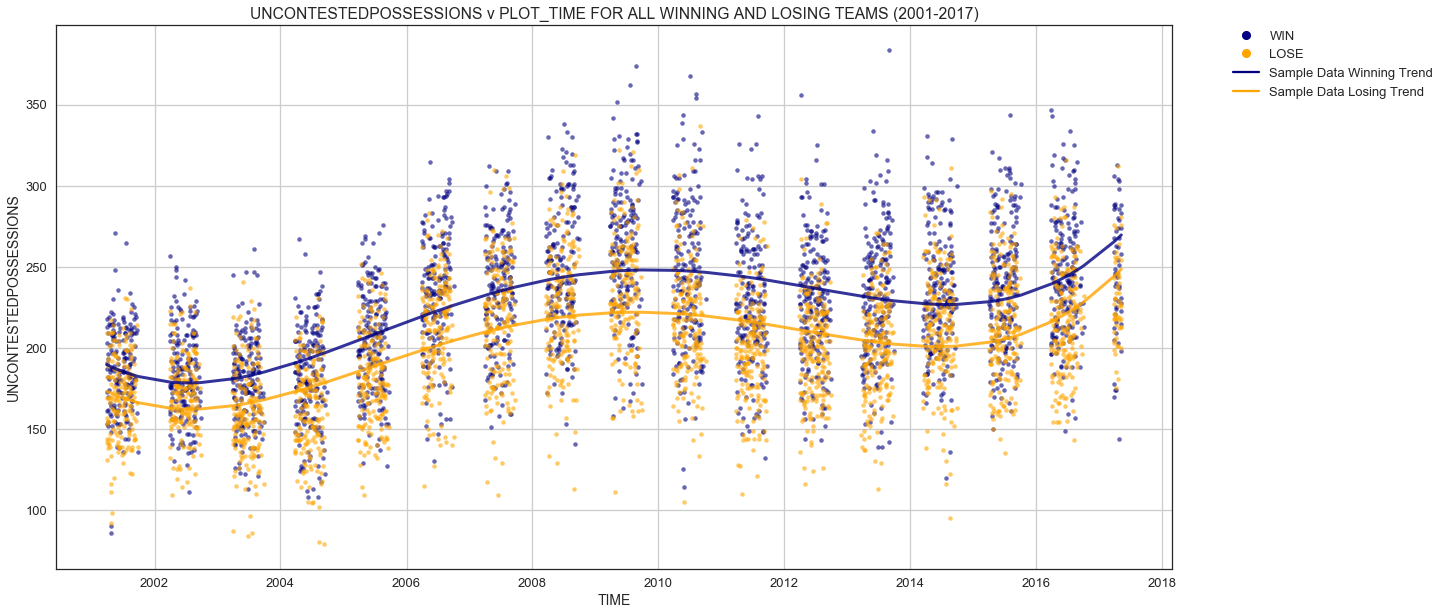

In [175]:
interactive(make_graphfunction, input_data=input_data, comparison_data = comparison_data, teamname = teamname, year = year)